In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

In [2]:
crime = pd.read_csv('crime.csv')

In [7]:
crime = crime[crime['REPORTED_DATE'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p')) < datetime(2019, 1, 1)]

In [8]:
crime['Month'] = crime['REPORTED_DATE'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p').month)

In [9]:
for_area = crime.groupby('Month')[['IS_CRIME', 'IS_TRAFFIC']].sum()
for_area.columns = ['Crime', 'Traffic']

In [10]:
for_area

,Crime,Traffic
Month,,
1,26413,9251
2,23646,8747
3,27285,8931
4,27996,9186
5,29348,10188
6,28625,9940
7,29745,9931
8,30963,10262
9,29293,10316


In [11]:
plt.rcParams['figure.figsize'] = (12, 9)
plt.style.use('ggplot')

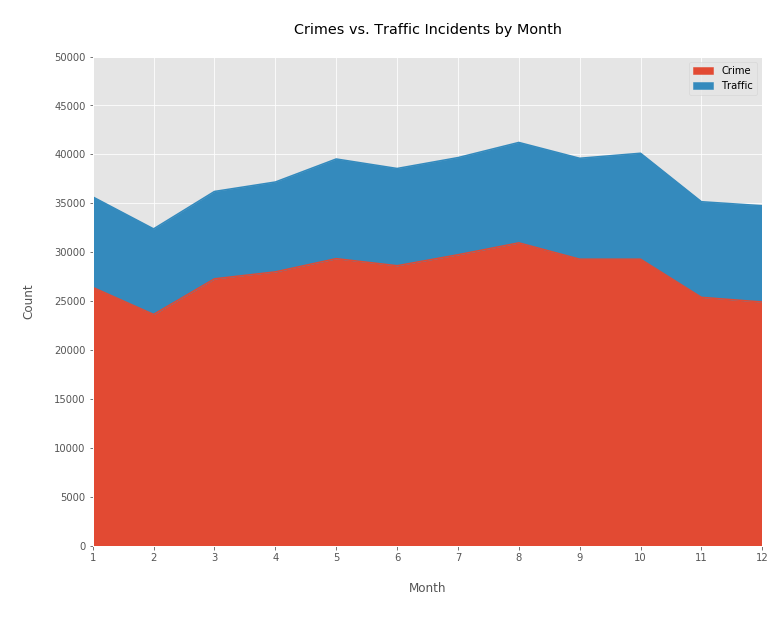

In [12]:
for_area.plot.area()
plt.title('\nCrimes vs. Traffic Incidents by Month\n')
plt.xlabel('\nMonth\n')
plt.ylabel('\nCount\n')
plt.xticks(np.arange(1, 13, step=1))
plt.yticks(np.arange(0, 55000, step=5000))
plt.savefig('StackedArea.png')